In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
from scipy.cluster.hierarchy import dendrogram,linkage

## 계층적 군집분석

#### scipy.cluster.hierarchy 라이브러리 사용

In [2]:
customer_data=pd.read_csv('shopping-data.csv')
customer_data.head()
#데이터 수집

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.shape

(200, 5)

In [4]:
#데이터 전처리(필요없는 열 제거)
data = customer_data.iloc[:,3:5].values

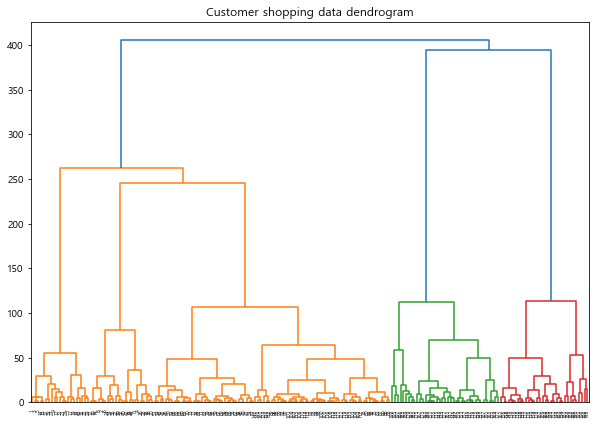

In [5]:
#시각화(덴드로그램 사용해 소비자의 쇼핑 데이터 표현)
plt.figure(figsize=(10,7))
plt.title('Customer shopping data dendrogram')
d = dendrogram(linkage(data,method='ward'))

#### sklearn.cluster 사용

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
cluster = AgglomerativeClustering(n_clusters=5,
                                  affinity='euclidean',
                                 linkage='ward')
#모델선정(군집(군집개수=5,군집거리측정방식=ward, 거리측정방식:유클리디안))

In [8]:
cluster.fit_predict(data)
#모델 학습,예측(변환)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

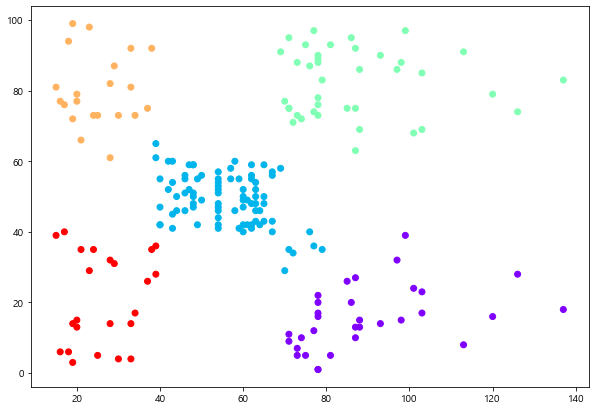

In [9]:
#시각화(산점도)
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=cluster.labels_, cmap='rainbow')
plt.show()

### 보스턴 데이터

In [10]:
from sklearn.datasets import load_boston

In [11]:
#데이터 수집
boston = load_boston()
data = pd.DataFrame(boston['data'],columns = boston['feature_names'])
target = pd.DataFrame(boston['target'],columns = ['price'])

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [12]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [13]:
target

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


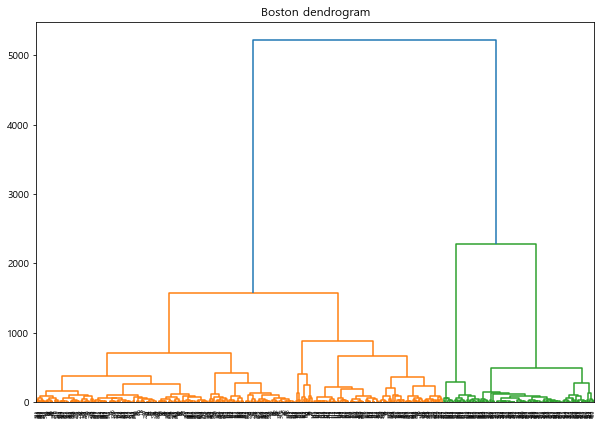

In [14]:
#덴드로그램,method='ward'
plt.figure(figsize=(10,7))
plt.title('Boston dendrogram')
d = dendrogram(linkage(data,method='ward'))

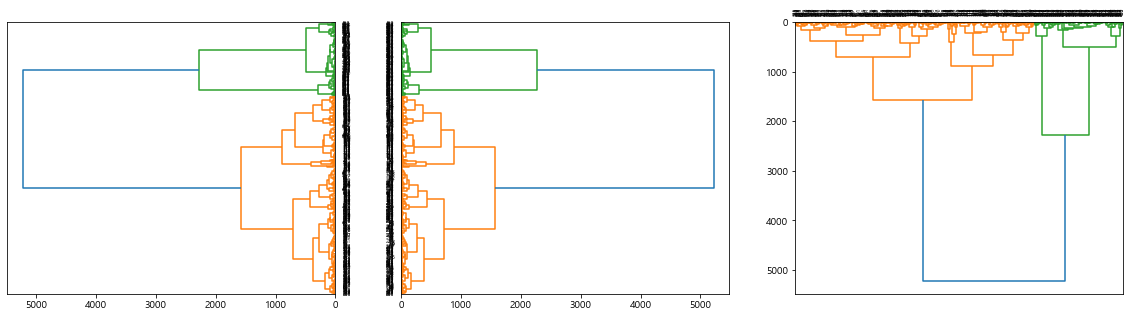

In [15]:
#덴드로그램 그래프 회전시켜보기
fig = plt.figure(figsize = (20,5))

ax1 = fig.add_subplot(1,3,1)
d1 = linkage(data,method='ward')
dr1 = dendrogram(d1,orientation='left')
#orientation = 시각화되어 나온 그래프를 회전시키는 하이퍼파라미터
#ax1.set_yticklabels(target[dr1['leaves']],minor=False)
#yticks는 범위설정이라 굳이 안줘도 그래프는 나옴

ax2 = fig.add_subplot(1,3,2)
d2 = linkage(data,method='ward')
dr2 = dendrogram(d2,orientation='right')
#orientation = 시각화되어 나온 그래프를 회전시키는 하이퍼파라미터
#ax2.set_yticklabels(target[dr2['leaves']],minor=False)
#yticks는 범위설정이라 굳이 안줘도 그래프는 나옴

ax3 = fig.add_subplot(1,3,3)
d3 = linkage(data,method='ward')
dr3 = dendrogram(d3,orientation='bottom')
#orientation = 시각화되어 나온 그래프를 회전시키는 하이퍼파라미터
#ax3.set_yticklabels(target[dr3['leaves']],minor=False)
#yticks는 범위설정이라 굳이 안줘도 그래프는 나옴

plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
cluster = AgglomerativeClustering(n_clusters=5,
                                  affinity='euclidean',
                                 linkage='ward')
#모델선정(군집(군집개수=5,군집거리측정방식=ward, 거리측정방식:유클리디안))

In [18]:
cluster.fit_predict(data)
#모델 학습,예측(변환)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4,
       1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 4, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,